In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv("./Salary_dataset.csv")

In [5]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,30.0,14.500000,8.803408,0.0,7.25,14.5,21.75,29.0
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


In [8]:
data.isna().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


In [9]:
data.drop(columns = 'Unnamed: 0', inplace = True)

# Exploratory Data Analysis (EDA)

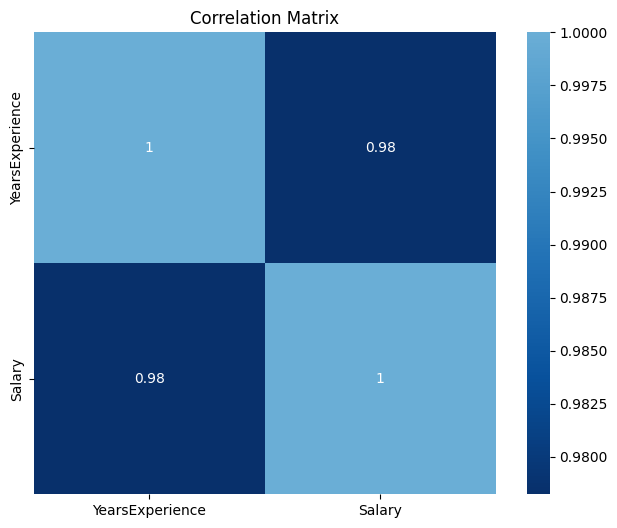

In [10]:
# Correlation Matrix and Heatmap
corr = data.corr()
plt.figure(figsize= (8, 6))
sns.heatmap(corr, annot=True, center = True, cmap = 'Blues_r', square=True)
plt.title("Correlation Matrix")
plt.show()

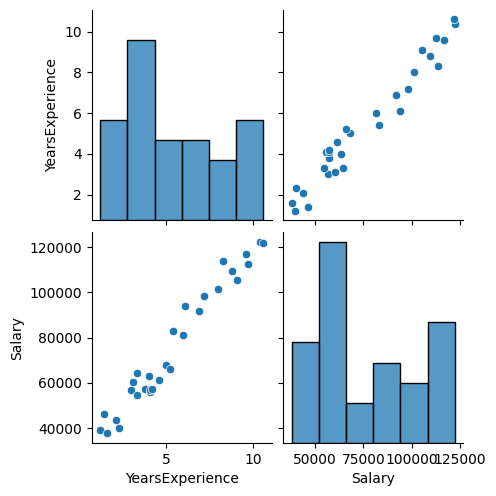

In [11]:
# Pair plot
sns.pairplot(data)

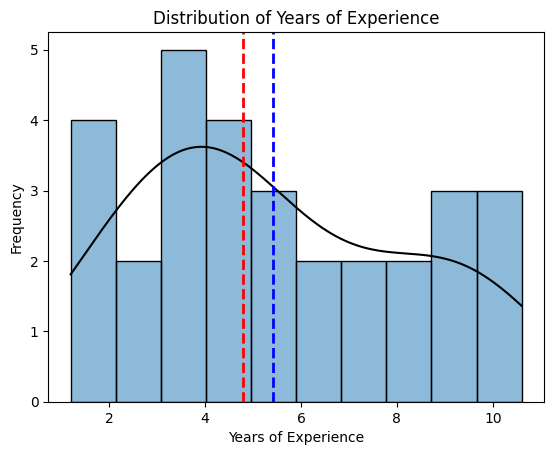

In [12]:
# Distribution of Years Experience
hist = sns.histplot(data['YearsExperience'], bins = 10, kde = True)
hist.lines[0].set_color("black")
hist.axvline(x = data['YearsExperience'].mean(), color = 'b', label = "Mean", linestyle = '--', linewidth = 2)
hist.axvline(x = data['YearsExperience'].median(), color = 'r', label = 'Median', linestyle = '--', linewidth = 2)
plt.title("Distribution of Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")
plt.show()

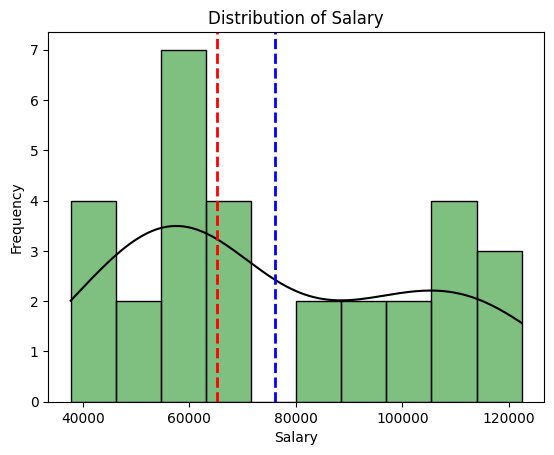

In [13]:
# Distribution of salary
hist = sns.histplot(data['Salary'], kde = True, bins = 10, color = 'green')
hist.lines[0].set_color("black")
hist.axvline(x = data['Salary'].mean(), color = 'b', label = "Mean", linestyle = '--', linewidth = 2)
hist.axvline(x = data['Salary'].median(), color = 'r', label = 'Median', linestyle = '--', linewidth = 2)
plt.title("Distribution of Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

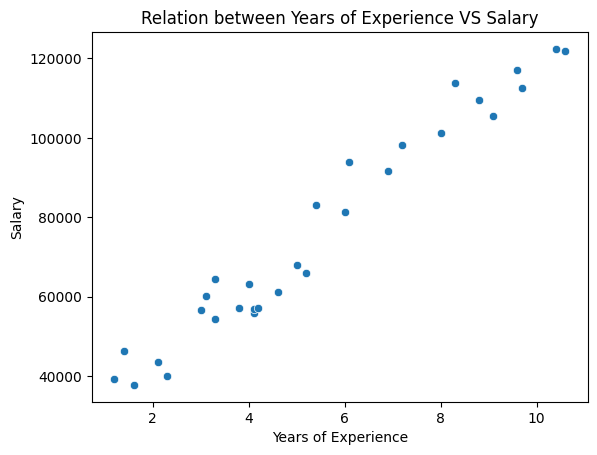

In [14]:
# Visualize the relationship between Years of Experience and Salary
sns.scatterplot(x = 'YearsExperience', y = 'Salary', data = data)
plt.title('Relation between Years of Experience VS Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

<Axes: xlabel='Salary'>

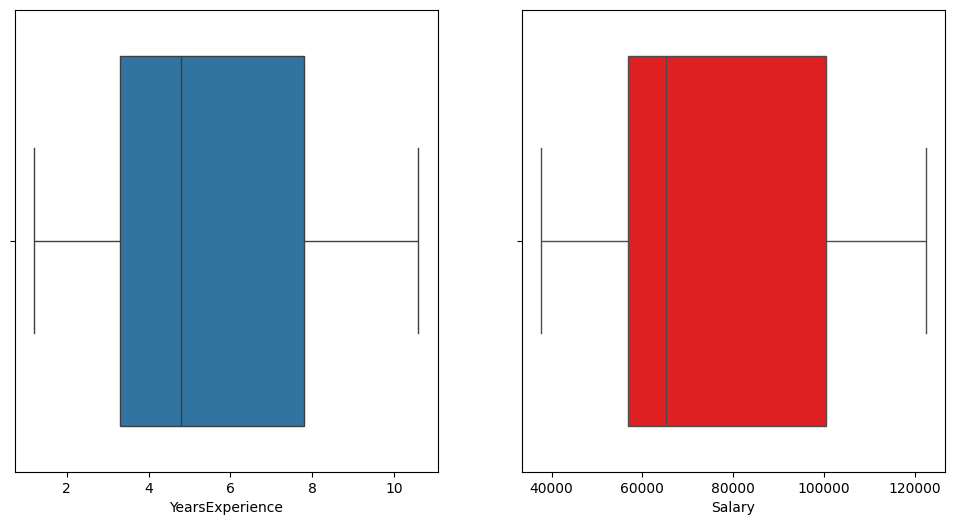

In [15]:
# Box plot
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.boxplot(x = 'YearsExperience', data = data, ax = ax[0])
sns.boxplot(x = 'Salary', data = data, ax = ax[1], color = 'red')

In [16]:
# Calculate the correlation coefficient between YearsExperience and Salary
correlation = data['YearsExperience'].corr(data['Salary'])
print(f"Correlation coefficient between Years of Experience and Salary: {correlation: 0.2f}")

Correlation coefficient between Years of Experience and Salary:  0.98


## Split data into X, y

In [18]:
X = data[['YearsExperience']]
y = data['Salary']

### Split into X_train, X_test, y_train, y_test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle = True)

# Model Selection and Training

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

## Model Evaluation

In [23]:
# test if there overfitting
print("LinearRegression Train Score: ", model.score(X_train, y_train))
print("LinearRegression Test score: ", model.score(X_test, y_test))

LinearRegression Train Score:  0.9614937334264035
LinearRegression Test score:  0.934951117043928


In [24]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error is: {mse: 0.2f}")

Mean Squared Error is:  53241800.10


In [25]:
# R-squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:0.2f}")

R-squared: 0.93


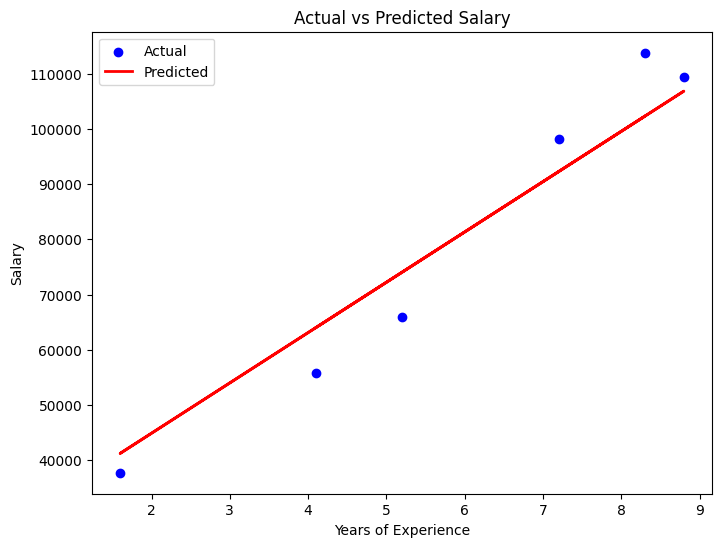

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()